# 신경망

## 신경망의 층에 대한 내용으로 올바르지 않은 것을 고르시오.
신경망의 층
1. 신경망의 구조는 입력층, 은닉층, 출력층으로 이루어져 있습니다.
2. 입력층은 다수의 입력신호를 받고, 출력층은 하나의 출력신호를 출력합니다.
3. 입력층과 출력층 사이의 층을 은닉층이라고 부릅니다.
4. 은닉층은 사람 눈에는 보이지 않습니다. 
5. 2층 신경망의 경우 0층은 입력층, 1층은 은닉층, 2층은 출력층이 됩니다.

## 활성화 함수는 입력 신호의 총합을 출력 신호로 변환하는 함수 입니다.
활성화 함수의 정의  
Yes / No

## 활성화 함수에 대한 내용으로 올바르지 않은 것을 고르시오.
시그모이드 함수와 계단 함수
1. 시그모이드 함수의 식은 $h(x) = {1 \over 1+\exp(-x)}$ 0과 1사이의 연속적인 실수를 출력합니다.
2. 시그모이드 함수는 입력값 x가 커질수록 1에 가까운 실수를 출력합니다.
3. 계단 함수는 입력이 0을 넘으면 1을 출력하고 그 이외에는 0을 출력하는 함수입니다.
4. 시그모이드 함수, 계단 함수는 모두 비선형 함수 입니다.
5. 비선형 함수를 사용하는 이유는 층을 쌓음으로써 얻는 이점을 얻기 위해서 입니다.

## 함수에 무언가 입력했을 때 출력이 입력의 상수배만큼 변하는 함수를 선형함수라고 부르며, 선형 함수는 1개의 직선이 됩니다.
선형함수, 비선형함수  
Yes / No

## 활성화 함수로 선형 함수를 사용하게되면 은닉층의 의미가 사라지게 됩니다.
비선형 함수의 필요성  
Yes / No

## 시그모이드 함수를 만든 뒤 아래의 조건에 맞는 그래프를 출력하시오.
시그모이드 구현  
```np.exp()```를 활용합니다.
그래프의 x축은 -5 ~ 5 까지 0.1의 간격으로 생성된 값입니다.  
그래프의 y축은 시그모이드 함수를 거쳐서 나온 값으로 0 ~ 1의 값을 가집니다.

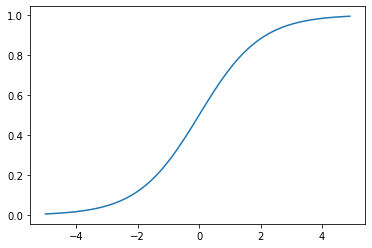

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.show()

## 올바른 형태의 값으로 계산하시오.
다차원 배열의 계산

Y의 shape가 (2,1)이 나오는 W를 구하시오 (어떠한 값을 넣든 상관없으며 shape형태만 맞추면 됩니다.)

In [6]:
X = np.array([[1,2,3,4], [5,6,7,8]])
W = np.array([[0.2],[0.3],[0.4],[0.5]]) # <----- 빈칸 문제
Y = np.dot(X,W)
Y.shape

(2, 1)

## 3층 신경망을 구현한 코드에서 올바른 주석 내용을 고르시오
신경망 구현

In [3]:
# 항등 함수는 출력층의 활성화 함수로 이용하겠습니다. 
def identity_function(x):
    return x

1. init_network()는 매개변수인 초기 가중치와 편향을 저장한 함수입니다. 

In [9]:
def init_network():
    network = {}
    network["W1"] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network["b1"] = np.array([0.1,0.2,0.3])
    network["W2"] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network["b2"] = np.array([0.1,0.2])
    network["W3"] = np.array([[0.1,0.3],[0.2,0.4]])
    network["b3"] = np.array([0.1,0.2])
    return network

2. forward()는 신경망의 순방향 처리를 표현한 함수 입니다.

3. forward()는 각 층마다 활성화함수를 적용해주고 있습니다.

4. 은닉층의 shape는 (2, ) 입니다.

In [4]:
def forward(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]
    
    a1 = np.dot(x, W1) + b1 
    z1 = sigmoid(a1)         # 입력층
    a2 = np.dot(z1, W2) + b2 
    z2 = sigmoid(a2)         # 은닉층
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)# 출력층
    
    return y

5. 입력값을 forward()에 넣으면 은닉층을 거쳐서 출력층의 활성화 함수에 의해 변환되어진 값이 출력됩니다.

In [11]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 출력층 설계에 대한 내용으로 올바르지 않은 것을 고르시오.
출력층의 설계
1. 출력층은 어떤 활성화 함수를 거치느냐에 따라서 결과가 달라집니다.
2. 신경망으로 해결하고자 하는 문제가 회귀인 경우 항등 함수를 사용합니다.
3. 이진 분류문제에서는 시그모이드 함수, 다중 분류문제에서는 소프트 맥스 함수를 사용합니다.
4. 소프트 맥스 함수를 사용시 오버 플로 문제를 조심해야 하며, 이 문제는 지수에 아주 작은 값을 더하면 해결이 됩니다.
5. 소프트 맥스 함수는 각 레이블의 확률을 출력하며 총합은 1이 나오도록 하는 활성화 함수 입니다.
6. 분류하고자 하는 클래수 수에 따라서 출력층 노드의 개수를 조절합니다.

## MNIST 데이터셋을 분류하는 모델을 만드는데 고려해야 하는 내용 중 틀린 것을 고르시오.
실전예제 데이터 다루기
1. MNIST는 0~9가 그려져 있는 그림을 분류하는 데이터셋이기에 소프트 맥스 함수를 출력층에 사용해야 합니다.
2. 학습이 된 신경망이 제대로 학습이 되었는지 확인하는 기준으로 정확도가 있습니다.
3. 0 ~ 255의 값을 가지는 픽셀을 0.0 ~ 1.0 사이의 숫자로 변환하는 방법을 정규화라고 합니다.
4. 입력 데이터에 특정 변환을 가하는 것을 데이터 전처리라고 합니다.
5. 여러 입력 데이터를 하나의 묶음으로 만든 것을 배치라고 부릅니다.